# Libraries Used

In this notebook, I'll be using several Python libraries for data manipulation, analysis, and visualization. Here's a brief overview of the libraries and their purposes:

- **pandas**: Used for data manipulation and analysis, particularly for handling structured data.
- **seaborn**: Built on top of matplotlib, seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
- **NumPy**: Essential for scientific computing with Python, it provides support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **matplotlib**: Used for creating static, interactive, and animated visualizations in Python.
- **Google Colab**: An online platform based on Jupyter Notebooks, providing free access to computing resources, including GPUs and TPUs.

These libraries will be utilized throughout the notebook for tasks such as data preprocessing, feature engineering, and creating visual representations of our data.


In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mounting Google Drive

To access files from Google Drive, we'll need to mount Google Drive in our notebook. This allows us to read and write files directly from our Google Drive storage.

To mount Google Drive, run the following code snippet:

In [15]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




# Loading the Dataset

We'll start by loading the dataset into a pandas DataFrame. The dataset is located at the specified file path, and we'll use `pd.read_csv()` to read it into a DataFrame.

In [16]:
pd.set_option('display.max_columns', None)# Setting display option to show all columns
file_path = '/content/drive/MyDrive/Trajectories_copy/Trajectories/ExpresswayA-01.csv'
df = pd.read_csv(file_path)
df

,frameNum,carId,carCenterX,carCenterY,headX,headY,tailX,tailY,boundingBox1X,boundingBox1Y,boundingBox2X,boundingBox2Y,boundingBox3X,boundingBox3Y,boundingBox4X,boundingBox4Y,carCenterXft,carCenterYft,headXft,headYft,tailXft,tailYft,boundingBox1Xft,boundingBox1Yft,boundingBox2Xft,boundingBox2Yft,boundingBox3Xft,boundingBox3Yft,boundingBox4Xft,boundingBox4Yft,speed,heading,course,laneId
0,0,0,947,236,907,213,987,260,917.0,196.0,997.0,243.0,978.0,277.0,898.0,230.0,173.448386,43.224730,166.122161,39.012150,180.774612,47.620465,167.953717,35.898504,182.606168,44.506819,179.126211,50.734111,164.473760,42.125796,18.051336,33.300213,213.300213,2
1,0,34,2855,991,2899,991,2811,991,2899.0,1010.0,2811.0,1010.0,2811.0,973.0,2899.0,973.0,522.909338,181.507234,530.968186,181.507234,514.850490,181.507234,530.968186,184.987191,514.850490,184.987191,514.850490,178.210433,530.968186,178.210433,14.094559,180.215412,0.215412,10
2,0,9,2068,509,2024,509,2113,509,2024.0,490.0,2113.0,490.0,2113.0,529.0,2024.0,529.0,378.765853,93.226218,370.707005,93.226218,387.007857,93.226218,370.707005,89.746261,387.007857,89.746261,387.007857,96.889331,370.707005,96.889331,38.906880,359.708883,179.708883,4
3,0,35,3274,984,3314,984,3235,984,3314.0,1000.0,3235.0,1000.0,3235.0,968.0,3314.0,968.0,599.651549,180.225145,606.977775,180.225145,592.508480,180.225145,606.977775,183.155635,592.508480,183.155635,592.508480,177.294655,606.977775,177.294655,14.142310,180.555174,0.555174,10
4,0,8,2058,576,2020,576,2096,576,2020.0,559.0,2096.0,559.0,2096.0,594.0,2020.0,594.0,376.934297,105.497646,369.974383,105.497646,383.894211,105.497646,369.974383,102.384000,383.894211,102.384000,383.894211,108.794447,369.974383,108.794447,30.867986,359.578815,179.578815,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290684,8998,1217,852,876,894,876,810,876,894.0,893.0,810.0,893.0,810.0,860.0,894.0,860.0,156.048601,160.444336,163.741138,160.444336,148.356064,160.444336,163.741138,163.557982,148.356064,163.557982,148.356064,157.513846,163.741138,157.513846,37.486791,180.218705,0.218705,7
290685,8998,1189,2419,573,2376,573,2462,573,2376.0,557.0,2462.0,557.0,2462.0,590.0,2376.0,590.0,443.053481,104.948179,435.177789,104.948179,450.929174,104.948179,435.177789,102.017689,450.929174,102.017689,450.929174,108.061825,435.177789,108.061825,41.918344,359.631491,179.631491,5
290686,8998,1150,4471,1161,4512,1189,4431,1134,4500.0,1207.0,4419.0,1152.0,4443.0,1116.0,4524.0,1171.0,818.888845,212.643692,826.398226,217.772050,811.562619,207.698490,824.200358,221.068852,809.364752,210.995292,813.760487,204.401689,828.596093,214.475249,20.780640,211.647976,31.647976,11
290687,8998,582,2525,1009,2564,1009,2486,1009,2564.0,1026.0,2486.0,1026.0,2486.0,993.0,2564.0,993.0,462.467979,184.804036,469.611048,184.804036,455.324909,184.804036,469.611048,187.917682,455.324909,187.917682,455.324909,181.873546,469.611048,181.873546,0.299816,180.897669,0.897669,10


# Checking for Missing Values

To identify any missing values in our dataset, we'll create a boolean mask indicating whether each value in the DataFrame is missing or not. This mask will have the same shape as the original DataFrame, with `True` representing missing values and `False` representing non-missing values.




In [17]:
missing_mask = df.isnull()
print(missing_mask)

        frameNum  carId  carCenterX  carCenterY  headX  headY  tailX  tailY  \
0          False  False       False       False  False  False  False  False   
1          False  False       False       False  False  False  False  False   
2          False  False       False       False  False  False  False  False   
3          False  False       False       False  False  False  False  False   
4          False  False       False       False  False  False  False  False   
...          ...    ...         ...         ...    ...    ...    ...    ...   
290684     False  False       False       False  False  False  False  False   
290685     False  False       False       False  False  False  False  False   
290686     False  False       False       False  False  False  False  False   
290687     False  False       False       False  False  False  False  False   
290688     False  False       False       False  False  False  False  False   

        boundingBox1X  boundingBox1Y  boundingBox2X

# Checking for Redundancy (Duplicate Rows)

To ensure data integrity and identify any potential redundancy in our dataset, we'll check for duplicate rows. Duplicate rows are entries that have identical values across all columns.


In [18]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


# Creating Elapsed Time Feature

To incorporate temporal information into our dataset, we'll create a new feature called "timeelapsed." This feature represents the elapsed time of each frame in the recording from which our dataset was generated.


In [19]:
frame_rate = 30  # FPS of the drone camera
# Calculate elapsed time for each frame
df['timeelapsed'] = df['frameNum'] / frame_rate
print(df)

        frameNum  carId  carCenterX  carCenterY  headX  headY  tailX  tailY  \
0              0      0         947         236    907    213    987    260   
1              0     34        2855         991   2899    991   2811    991   
2              0      9        2068         509   2024    509   2113    509   
3              0     35        3274         984   3314    984   3235    984   
4              0      8        2058         576   2020    576   2096    576   
...          ...    ...         ...         ...    ...    ...    ...    ...   
290684      8998   1217         852         876    894    876    810    876   
290685      8998   1189        2419         573   2376    573   2462    573   
290686      8998   1150        4471        1161   4512   1189   4431   1134   
290687      8998    582        2525        1009   2564   1009   2486   1009   
290688      8998   1220        4825         467   4781    467   4870    467   

        boundingBox1X  boundingBox1Y  boundingBox2X

# Generating Acceleration Feature

To further enrich our dataset with dynamic information, we'll create a new feature called "Acceleration." This feature represents the rate of change of speed over time for each car in the dataset, leveraging the previously generated elapsed time and the existing speed features.



In [20]:
df['Delta_Speed'] = df.groupby('carId')['speed'].diff()
df['Delta_Time'] = df.groupby('carId')['timeelapsed'].diff()
df['Acceleration'] = df['Delta_Speed'] / df['Delta_Time']

df.dropna(subset=['Delta_Speed', 'Delta_Time'], inplace=True)

df.drop(['Delta_Speed', 'Delta_Time'], axis=1, inplace=True)
df.tail(50)

,frameNum,carId,carCenterX,carCenterY,headX,headY,tailX,tailY,boundingBox1X,boundingBox1Y,boundingBox2X,boundingBox2Y,boundingBox3X,boundingBox3Y,boundingBox4X,boundingBox4Y,carCenterXft,carCenterYft,headXft,headYft,tailXft,tailYft,boundingBox1Xft,boundingBox1Yft,boundingBox2Xft,boundingBox2Yft,boundingBox3Xft,boundingBox3Yft,boundingBox4Xft,boundingBox4Yft,speed,heading,course,laneId,timeelapsed,Acceleration
290639,8997,1182,4326,792,4366,792,4286,792,4366.0,809.0,4286.0,809.0,4286.0,776.0,4366.0,776.0,792.331278,145.059263,799.657503,145.059263,785.005052,145.059263,799.657503,148.172909,785.005052,148.172909,785.005052,142.128773,799.657503,142.128773,45.599798,180.390197,0.390197,6,299.900000,-2.011021e+00
290640,8997,1193,2313,867,2361,867,2266,867,2361.0,887.0,2266.0,887.0,2266.0,847.0,2361.0,847.0,423.638984,158.795936,432.430455,158.795936,415.030669,158.795936,432.430455,162.459048,415.030669,162.459048,415.030669,155.132823,432.430455,155.132823,35.206830,180.478605,0.478605,7,299.900000,-5.973468e+00
290641,8997,1157,4921,864,4963,864,4879,864,4963.0,882.0,4879.0,882.0,4879.0,846.0,4963.0,846.0,901.308880,158.246469,909.001417,158.246469,893.616344,158.246469,909.001417,161.543270,893.616344,161.543270,893.616344,154.949667,909.001417,154.949667,43.245066,180.823711,0.823711,7,299.900000,-5.869438e-09
290642,8997,1194,2961,443,2921,443,3001,443,2921.0,426.0,3001.0,426.0,3001.0,461.0,2921.0,461.0,542.323836,81.137946,534.997610,81.137946,549.650061,81.137946,534.997610,78.024301,549.650061,78.024301,549.650061,84.434748,534.997610,84.434748,43.522605,359.448714,179.448714,3,299.900000,2.152566e+00
290643,8997,1184,1657,500,1613,500,1702,500,1613.0,481.0,1702.0,481.0,1702.0,519.0,1613.0,519.0,303.488887,91.577818,295.430039,91.577818,311.730891,91.577818,295.430039,88.097860,311.730891,88.097860,311.730891,95.057775,295.430039,95.057775,38.248050,359.405899,179.405899,4,299.900000,1.496403e-10
290644,8997,1202,1838,991,1885,989,1792,993,1886.0,1011.0,1793.0,1015.0,1791.0,972.0,1884.0,968.0,336.640057,181.507234,345.248372,181.140923,328.214898,181.873546,345.431528,185.170347,328.398054,185.902970,328.031743,178.027277,345.065217,177.294655,27.995441,178.342430,358.342430,10,299.900000,4.003440e+00
290645,8997,1181,3064,880,3108,879,3020,881,3109.0,898.0,3021.0,900.0,3020.0,863.0,3108.0,861.0,561.188866,161.176959,569.247714,160.993803,553.130018,161.360115,569.430870,164.473760,553.313174,164.840072,553.130018,158.063313,569.247714,157.697002,36.936954,179.782312,359.782312,7,299.900000,2.700645e-08
290646,8997,582,2524,1009,2563,1009,2485,1009,2563.0,1026.0,2485.0,1026.0,2485.0,993.0,2563.0,993.0,462.284823,184.804036,469.427893,184.804036,455.141753,184.804036,469.427893,187.917682,455.141753,187.917682,455.141753,181.873546,469.427893,181.873546,0.299816,180.979279,0.979279,10,299.900000,0.000000e+00
290647,8997,1211,741,948,782,947,701,949,782.0,964.0,701.0,966.0,701.0,933.0,782.0,931.0,135.718326,173.631542,143.227707,173.448386,128.392100,173.814698,143.227707,176.562032,128.392100,176.928344,128.392100,170.884208,143.227707,170.517896,12.679668,180.226485,0.226485,8,299.900000,-4.022459e+00
290648,8997,1174,1247,459,1214,459,1280,459,1214.0,444.0,1280.0,444.0,1280.0,474.0,1214.0,474.0,228.395077,84.068437,222.350941,84.068437,234.439213,84.068437,222.350941,81.321102,234.439213,81.321102,234.439213,86.815771,222.350941,86.815771,40.588280,359.423956,179.423956,3,299.900000,-1.961524e+00


# Plotting Speed vs. FrameNum

To visualize the relationship between speed and frame number, we'll create a scatter plot using seaborn (`sns.scatterplot()`). We'll specify the frame number (`frameNum`) on the x-axis and the speed (`speed`) on the y-axis.


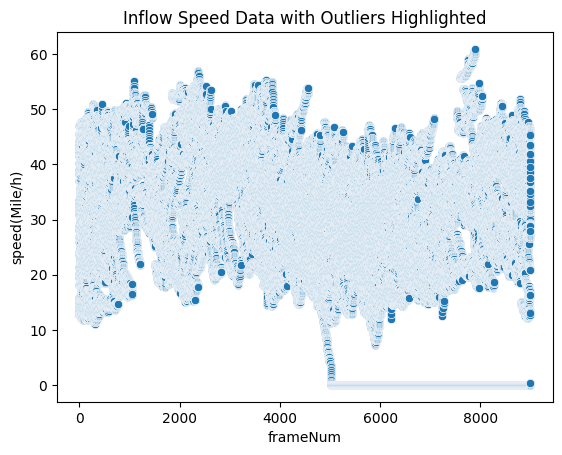

In [21]:
sns.scatterplot(x="frameNum", y="speed", data=df)
plt.xlabel("frameNum")
plt.ylabel("speed(Mile/h)")
plt.title("Inflow Speed Data with Outliers Highlighted")

plt.show()

# Identifying Outliers in Speed Column

To identify outliers in the speed column of our dataset, we'll create a scatter plot of speed versus frame number. Outliers are data points that significantly deviate from the overall pattern of the data and may indicate anomalies or errors.

In this visualization, we'll set a threshold to define outliers in the speed column. Data points with speed values exceeding the threshold (either above or below) will be considered outliers.


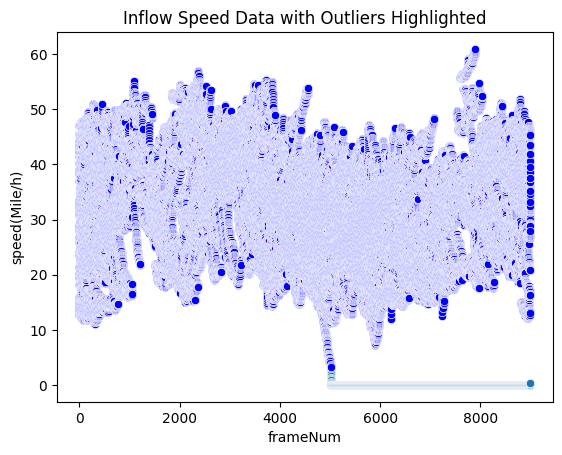

In [22]:

sns.scatterplot(x="frameNum", y="speed", data=df)

threshold = 3
outliers = df[(df['speed'] > threshold) | (df['speed'] < -threshold)]

sns.scatterplot(x="frameNum", y="speed", data=outliers, color='blue', marker='o')

plt.xlabel("frameNum")
plt.ylabel("speed(Mile/h)")
plt.title("Inflow Speed Data with Outliers Highlighted")

plt.show()


# Removing Outliers using Interquartile Range (IQR) Method

To robustly remove outliers from the speed column of our dataset, we'll utilize the Interquartile Range (IQR) method. The IQR method is based on the difference between the first quartile (Q1) and the third quartile (Q3) of the data distribution.

In this approach, outliers are defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. Any data points outside this range are considered outliers and will be removed from the dataset.


In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scatter Plot of Removed Speed Outliers

After applying the Interquartile Range (IQR) method to remove outliers from the speed column, we'll visualize the cleaned dataset by creating a scatter plot of speed versus frame number. This plot will help us examine the distribution of speed values after removing outliers.


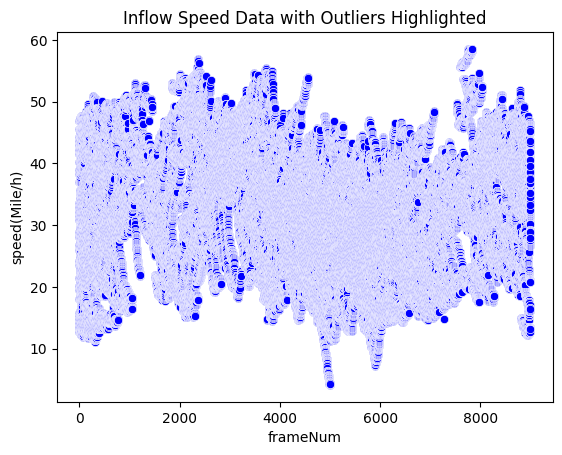

In [24]:
sns.scatterplot(x="frameNum", y="speed", data=df_outliers_removed)
threshold = 3  # Example threshold for identifying outliers
outliers = df_outliers_removed[(df_outliers_removed['speed'] > threshold) | (df_outliers_removed['speed'] < -threshold)]

sns.scatterplot(x="frameNum", y="speed", data=outliers, color='blue', marker='o')

plt.xlabel("frameNum")
plt.ylabel("speed(Mile/h)")
plt.title("Inflow Speed Data with Outliers Highlighted")

# Show the plot
plt.show()

# Role Feature Generation

In this dataset, each vehicle is assigned a role as either an 'ego' or an 'agent' based on dynamic scenarios. A scenario starts when an ego vehicle appears and ends when it disappears from subsequent frames. Within each scenario, one vehicle is randomly chosen as the ego; other vehicles present become agents. This role persists for a vehicle across the dataset once assigned as an ego, ensuring role consistency across frames. New scenarios commence with the disappearance of the previous ego, continuing the cycle of role assignment.


In [25]:
def process_data(df):

    car_roles = {}
    results = []

    for _, frame_group in df.groupby('frameNum'):

        current_frame_car_ids = frame_group['carId'].unique()
        assigned_roles = {car_id: car_roles.get(car_id) for car_id in current_frame_car_ids}

        if 'AV' not in assigned_roles.values() and None in assigned_roles.values():
            new_ego = np.random.choice([k for k, v in assigned_roles.items() if v is None])
            car_roles[new_ego] = 'AV'

        frame_group['role'] = frame_group['carId'].apply(lambda x: car_roles.setdefault(x, 'Others'))

        results.append(frame_group)

    return pd.concat(results)

processed_df = process_data(df_outliers_removed)
processed_df[['carId', 'role']].head(50)



,carId,role
47,45,Others
48,42,Others
49,36,Others
50,15,Others
51,33,Others
52,27,Others
53,7,Others
54,21,Others
55,29,Others
56,16,Others


#Data Splitting
In this project, we utilize a time-based splitting strategy to organize our dataset into training, validation, and testing segments. This approach ensures that the temporal order of our data is preserved, which is essential for maintaining the integrity of our time-sensitive analyses. Specifically, we allocate the first 75% of the data for training, the subsequent 15% for validation, and the final 10% for testing. This method is particularly crucial for preventing information leakage and ensuring that our model predictions are based strictly on historical data, thus mimicking real-world forecasting scenarios.

In [26]:
train_size = int(len(processed_df) * 0.75)
validation_size = int(len(processed_df) * 0.15)
test_size = len(processed_df) - train_size - validation_size  # Ensures all data is accounted for due to rounding

# Split the data
train_data = processed_df.iloc[:train_size]
validation_data = processed_df.iloc[train_size:train_size + validation_size]
test_data = processed_df.iloc[train_size + validation_size:]


# Saving Processed Data to CSV Files

After splitting the dataset according to our time-based strategy, we proceed to save each segment into CSV files designated for training, validation, and testing. The data is stored without indexing to ensure the files are clean and immediately usable. This approach facilitates efficient data management and streamlines the workflow for subsequent model training and evaluation phases. Upon completion, the system confirms the successful saving of each dataset, providing clear feedback on the operation's success.


In [27]:
train_path = '/mnt/train/train_data_0001.csv'
validation_path = '/mnt/validate/validation_data_0001.csv'
test_path = '/mnt/test/test_data_0001.csv'

train_data.to_csv(train_path, index=False)
validation_data.to_csv(validation_path, index=False)
test_data.to_csv(test_path, index=False)

print(f"Training data saved to {train_path}")
print(f"Validation data saved to {validation_path}")
print(f"Test data saved to {test_path}")

Training data saved to /mnt/train/train_data_0001.csv
Validation data saved to /mnt/validate/validation_data_0001.csv
Test data saved to /mnt/test/test_data_0001.csv
